#Parte I: Creación de variables, histogramas, kernels yresumen de la base de datos final
La idea de esta primera parte es que completen la limpieza de la base de datos
que contiene las observaciones del primer trimestre de 2004 y del primer
trimestre de 2024. La base final a trabajar resultante debe incluir todas las
variables presentes en ambos trimestres, expresadas de manera homogénea.
Es decir, si la variable CH04 en 2004 toma los valores “Hombre” o “Mujer”, y
en 2024 toma los valores 1 y 2, la variable limpia en la base final debe tener
solamente dos valores consistentes.


#1)
Cree la variable “edad2” definida como edad2 (edad al cuadrado). Presente
un histograma de la variable edad en un panel A, y a la par una
distribución de kernels para los ocupados y desocupados en un panel B
(esto es, son dos lineas de kernel en este segundo panel). Comente
brevemente la distribución de edades en estos dos panels (3-4 oraciones).

In [683]:
import pandas as pd
import numpy as np
import os
import random
#Para crear datos con distribucion normal en otro modulo
from scipy.stats import norm
#Importo matplotlib.pyplot
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
!pip install seaborn
import seaborn as sns

In [570]:
url = "https://github.com/RoccoGabrielPimenta/BigDataUBA-Grupo22/raw/refs/heads/main/TP%202/usu_individual_T124.xlsx"
df = pd.read_excel(url)
df.head(5) 
pd.set_option('display.masx_columns', 6)


OptionError: No such keys(s): 'display.masx_columns'

In [ ]:
url = "https://github.com/RoccoGabrielPimenta/BigDataUBA-Grupo22/raw/refs/heads/main/TP%202/usu_individual_t104.dta"
df2 = pd.read_stata(url)
df2

In [ ]:
#lo primero que hacemos es tomar los datos de la region patagonica del año 2004. Para eso filtramos el inclullendo solo aquellas regiones que responden a la patagonia.
#Luego, tomamos los datos de la region patagonica del año 2024. Para eso filtramos el inclullendo solo aquellas regiones que responden al numero 42.
#Para concluir,juantamos las distitas que responden a esta region.
df2[df2["region"]=='Patagónica']
df3 = df[df["REGION"]==42]
df3
df4 = df2[df2["region"]=="Patagónica"]
df4.columns = df4.columns.str.upper()
df4
df_completo = pd.concat([df3,df4],axis=0)
df_completo 


In [ ]:
columnas = df_completo.columns.to_list()
for i, item in enumerate(columnas, start=0):
    print(i,item)

In [620]:
#Indicamos cuáles de esas columnas vamos a estar utilizando
columnas_a_usar = [1,13,19,20,21,27,44,45,132]
columnas_a_usar1 = [27] 


In [622]:
#filtramos las columnas que queremos en un nuevo dataset
df_filtrado_24 = df_completo.iloc[0:4513, columnas_a_usar]
df_filtrado_04 = df_completo.iloc[4513:7777, columnas_a_usar]

In [624]:
df8 = df_filtrado_04
df8["CH06"] = df8["CH06"].replace({'Menos de 1 año':0, '98 y más años':98})
df8['ESTADO'] = df8['ESTADO'].replace({
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    "Menor de 10 años" : 4
})
df8["CH12"] = df8["CH12"].replace({"Jardín/Preescolar":0, "Primario":6, "EGB":9, "Secundario":12, "Polimodal":12, "Terciario":18, "Universitario":18, "Posgrado Universitario":24, "Educación especial (discapacitado)":0})
df8["CH13"] = df8["CH13"].replace({"Sí":0, "No":-1, "Ns./Nr.":0})
df8["CH14"] = df8["CH14"].replace({"Ninguno":6, "Primero":5, "Segundo":4, "Tercero":3, "Cuarto":2, "Quinto":1, "Sexto":6, "Séptimo":7, "Octavo":8, "Noveno":9,"Educación especial":0,"Ns/Nr":0})
df8 
df9 = df_filtrado_24 
df9["CH12"] = df9["CH12"].replace({0:0, 2:6, 3:9, 4:12, 5:12, 6:18, 7:18,8:24, 9:0})
df9["CH13"] = df9["CH13"].replace({0:0, 1.0:-1, 9:0})
df9["CH14"] = df9["CH14"].replace({0:6, 1:5, 2:4,3:3, 4:2, 5:1, 6:6, 7:7,8:8, 9:9, 98:0, 99:0})

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14072\4108713961.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df8["CH06"] = df8["CH06"].replace({'Menos de 1 año':0, '98 y más años':98})
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14072\4108713961.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df8['ESTADO'] = df8['ESTADO'].replace({
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14072\4108713961.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old

In [626]:
ultimo_df = pd.concat([df8, df9],axis=0)
ultimo_df = ultimo_df.replace("NaN", 0)
ultimo_df = ultimo_df.replace([np.nan, -np.inf], 0)
ultimo_df = ultimo_df.apply(pd.to_numeric, errors='coerce').fillna(0)
ultimo_df['CH13'] = ultimo_df['CH13'].replace(2, -1)

pd.set_option("display.max_rows", 8)

ultimo_df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14072\1233392675.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ultimo_df = ultimo_df.replace([np.nan, -np.inf], 0)


,ANO4,CH06,CH12,CH13,CH14,ESTADO,PP3E_TOT,PP3F_TOT,P21
42025,2004.0,34.0,12.0,-1.0,1.0,1,36.0,0.0,1000.0
42026,2004.0,62.0,6.0,0.0,0.0,1,0.0,0.0,1200.0
42027,2004.0,58.0,6.0,0.0,0.0,3,0.0,0.0,0.0
42028,2004.0,38.0,12.0,-1.0,3.0,1,48.0,0.0,1200.0
...,...,...,...,...,...,...,...,...,...
45932,2024.0,34.0,12.0,-1.0,2.0,1,30.0,0.0,160000.0
45933,2024.0,10.0,6.0,-1.0,1.0,3,0.0,0.0,0.0
45934,2024.0,8.0,6.0,-1.0,3.0,4,0.0,0.0,0.0
45935,2024.0,6.0,6.0,-1.0,5.0,4,0.0,0.0,0.0


In [628]:
#edad2 = (ultimo_df[["CH06", "ESTADO","ANO4"]])

In [630]:
df_info = (ultimo_df[["CH06", "ESTADO","ANO4"]])

In [632]:
edad2=df_info[df_info['ESTADO'].isin([1, 2])]

In [634]:
#df_año = edad2[edad2['ANO4'].isin([2004, 2024])]

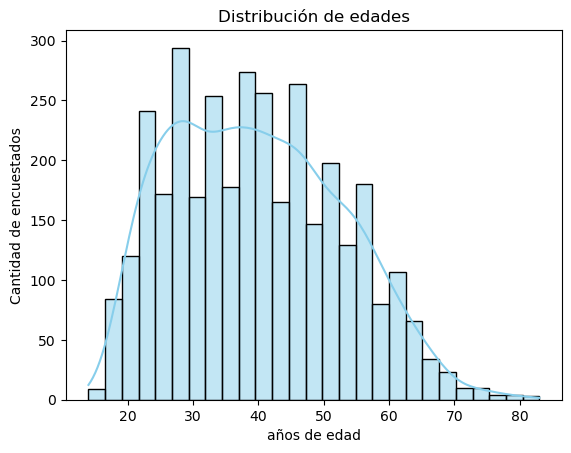

In [636]:
sns.histplot(data=edad2['CH06'], kde=True, color='skyblue')

plt.title("Distribución de edades")
plt.xlabel("años de edad")
plt.ylabel("Cantidad de encuestados")
plt.show()

In [637]:
ocupados = edad2[edad2['ESTADO'] == 'Ocupado']['CH06']
desocupados = edad2[edad2['ESTADO'] == 'Desocupado']['CH06']

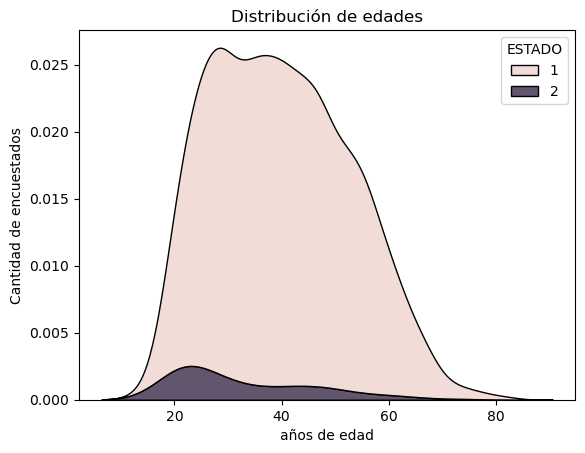

In [640]:
sns.kdeplot(data=edad2, x='CH06',hue="ESTADO",multiple="stack",)  # funcion de kernel de Seaborn

plt.axvline(ocupados.mean(), color='blue', linestyle='dashed', linewidth=1, label='ocupados')
plt.axvline(desocupados.mean(), color='red', linestyle='dashed', linewidth=1, label='desocupados')
plt.title("Distribución de edades")
plt.xlabel("años de edad")
plt.ylabel("Cantidad de encuestados")
plt.show()



#2)
Cree la variable educ definida como la cantidad de años de educación. Use
inteligentemente las variables CH12, CH13 y CH14 para crearla. Por
ejemplo, si dice que el nivel más alto de educación es “Secundario” (CH12),
“Sí” finalizo este nivel (CH13) y el ultimo año que aprobó (CH14) fue
“sexto”, entonces puede asumir que tiene educ=12, osea 12 años de
educación formal. Presente una estadistica descriptiva (promedio, sd, min,
p50, max) de dicha variable creada y comente


In [643]:
#1ro tomamos la columnas que nos interesan para hacer la variable.
#tomamos los datos CH12 y los remplasamos por el numero de años que equibale cada nivel de educacion. los datos de CH13 los cambiamos por un 0 en caso de ser 1 y -1 en caso de que no halla terminado.En CH14 le restamos a 6 el ultimo año que curso, exeptuando a los EGB.
educ=(ultimo_df[["CH12", "CH13","CH14"]])
educ 
pd.set_option('display.max_rows', 8) 
#creamos una variable en bace a esta relacion:
EDUC = educ["CH12"]+educ["CH13"]*educ["CH14"]
EDUC 
print(EDUC.describe())


count    7777.000000
mean        8.499679
std         8.303777
min       -98.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        24.000000
dtype: float64


#3)
Cree la variable salario_semanal como el total de ingresos habituales
(P21) dividido 40. Esta variable nos da una aproximación del salario
semanal suponiendo que la persona trabaja a tiempo completo 8 horas al
dia, 5 dias a la semana (8x5=40). Sin embargo, antes de hacer dicha
división recuerde su bonus de economista. Los pesos de 2004 tienen un
poder de compra distinto a los pesos de 2024 primer trimestre. Convierta
primero los ingresos de 2004 a pesos de 2024.

In [646]:
#inflacion entre el 2004 y el 2024 es un 70.006,46%
salario_semana=(ultimo_df["P21"])

salario_semana24 = salario_semana.iloc[0:4513]
salario_semana04 = salario_semana.iloc[4513:7777] 
salario_semana24 = salario_semana24/40 
salario_semana04 = salario_semana04*17.501615 
salario_semana  = pd.concat([salario_semana24, salario_semana04],axis=0)
df = salario_semana[salario_semana != 0]  

df


42025    2.500000e+01
42026    3.000000e+01
42028    3.000000e+01
42036    1.000000e+01
             ...     
45837    4.375404e+06
45838    6.125565e+06
45869   -1.575145e+02
45932    2.800258e+06
Name: P21, Length: 3137, dtype: float64

#a)
Similar al item 1, presente en un panel A, un histograma de la variable
salario_semanal y las distribuciones de kernels para ocupados y
desocupados en un panel B. Comente brevemente la distribución de
salarios en estos dos panels (3-4 oraciones).

In [649]:
estado=(ultimo_df["ESTADO"]) 

In [651]:
#pequeña limpieza para no tener en cuenta a los inactivos y menores de 10
df10 = pd.concat([salario_semana,estado],axis=1) 
df10 = df10[df10 != 3] 
df10 = df10[df10 != 4]  
df10= df10.dropna()
pd.set_option('display.max_rows', 8)
df10

,P21,ESTADO
42025,2.500000e+01,1.0
42026,3.000000e+01,1.0
42028,3.000000e+01,1.0
42036,1.000000e+01,1.0
...,...,...
45837,4.375404e+06,1.0
45838,6.125565e+06,1.0
45869,-1.575145e+02,1.0
45932,2.800258e+06,1.0


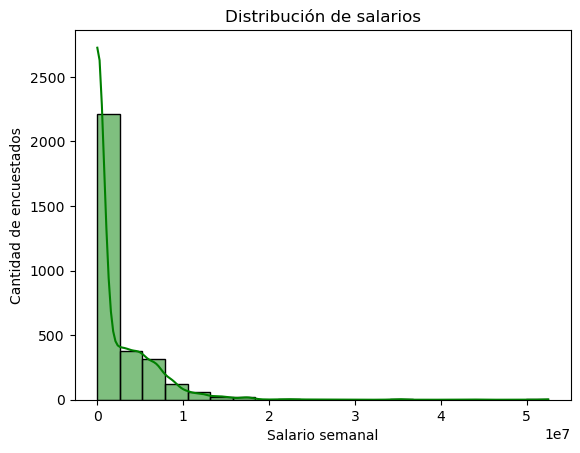

In [653]:
sns.histplot(data=df, kde=True, color='green', bins=20)
plt.title("Distribución de salarios")
plt.xlabel("Salario semanal")
plt.ylabel("Cantidad de encuestados")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14072\1818342304.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df10, x='P21',hue="ESTADO",multiple="stack",)  # funcion de kernel de Seaborn


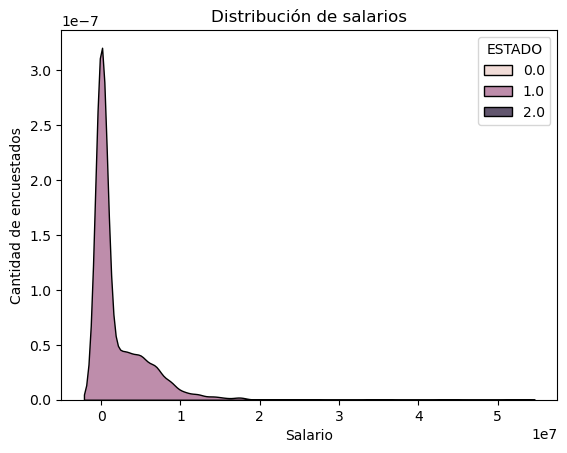

In [655]:


df_info = (df10[["P21", "ESTADO"]])
salario=df_info[df_info['ESTADO'].isin([1, 2])]
ocupados = salario[salario['ESTADO'] == 'Ocupado']['P21']
desocupados = salario[salario['ESTADO'] == 'Desocupado']['P21'] 

sns.kdeplot(data=df10, x='P21',hue="ESTADO",multiple="stack",)  # funcion de kernel de Seaborn

plt.axvline(ocupados.mean(), color='red', linestyle='dashed', linewidth=1, label='ocupados')
plt.axvline(desocupados.mean(), color='yellow', linestyle='dashed', linewidth=1, label='desocupados')
plt.title("Distribución de salarios")
plt.xlabel("Salario")
plt.ylabel("Cantidad de encuestados")

plt.show()



#4)
Cree la variable horastrab como el total de horas trabajadas como la suma
de las horas en la ocupación principal y otras ocupaciones (PP3E_TOT+
PP3F_TOT). Presente una estadistica descriptiva (promedio, sd, min, p50,
max) de dicha variable creada y comente

In [658]:
horastrab=(ultimo_df[["PP3E_TOT", "PP3F_TOT"]])
pd.set_option('display.max_rows', None)
horastrab
HORASTRAB = horastrab["PP3E_TOT"]+horastrab["PP3F_TOT"]
HORASTRAB
print(EDUC.describe())
horastrab.describe()

count    7777.000000
mean        8.499679
std         8.303777
min       -98.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        24.000000
dtype: float64


,PP3E_TOT,PP3F_TOT
count,7777.000000,7777.000000
mean,14.842613,0.514594
std,21.890702,3.214842
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,30.000000,0.000000
max,126.000000,50.000000


#5)
¿Cuál es el tamaño de la de la base de datos para su región con las
variables originales unificadas? Para ello complete la tabla 1 que se le
diseña abajo y comente.

In [703]:
pip install openpyxl.
df_estado_24 = df_completo.iloc[0:4513, columnas_a_usar1]
df_estado_04 = df_completo.iloc[4513:7777, columnas_a_usar1] 
df_estado_04['ESTADO'].value_counts()[2] 
df_estado_24['ESTADO'].value_counts()[2] 
df_estado_04['ESTADO'].value_counts()[1] 



SyntaxError: invalid syntax (3184479653.py, line 1)

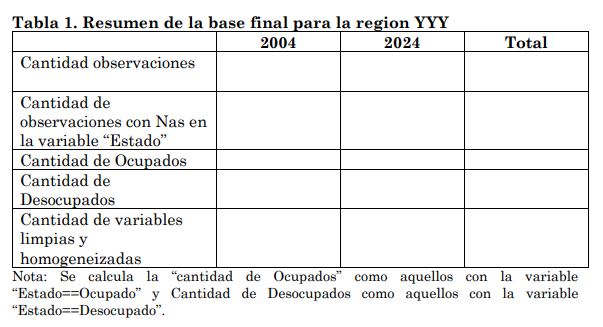

Como comentario rellenar el cuadro con los datos de los ejercicios

#Parte II: Métodos No Supervisados
Esta parte del trabajo práctico tiene como objetivo que realicen un análisis
visual de los datos utilizando las herramientas vistas en clase. En esta parte,
solo necesita utilizar las variables: edad, edad2, educ, salario_semanal y
horastrab.

#1.
Realice una matriz de correlaciones con estos cinco predictores para su
región y comente los resultados.

#2.
PCA con salario: Apliquen PCA a las cinco variables seleccionadas para
esta parte. Recuerde primero estandarizar las variables como el la
Clase 6. En un gráfico de dispersión muestre los indices (scores)
calculados del primer y segundo componente de PCA y comente los
resultados

#3.
Grafique con flechas los pronderadores (loading) de PCA para el primer
y segundo componente y comente los pesos que que le dan a cada
variable utilizada.

#4.
Finalmente, grafique la proporción de la varianza explicada para para
cada uno de los componentes y comente el grafico.

#5. Cluster k-medias:

#a.
Corran el algoritmo con 𝑘 = 2, 𝑘 = 4 y 𝑘 = 10 usando n_init =
20, y grafiquen los resultados usando dos predictores.
Interprétenlos.

#b.
Grafique edad y educ de los resultados de 𝑘 = 2 donde cada
punto tome dos colores, un color para ocupados y otro color para
desocupados. ¿Puede el algoritmo separar correctamente a las
personas ocupadas de las desocupadas? Comenten

#6.
Cluster jerárquico: utilizando las variables mencionadas arriba,
realicen un análisis de clustering jerárquico. Generen un dendograma
y expliquen brevemente qué es un dendograma.